In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import env

In [2]:
# function to deal with parsing one entry in our log data
def parse_log_entry(entry):
    parts = entry.split()
    output = {}
    output['ip'] = parts[0]
    output['timestamp'] = parts[3][1:].replace(':', ' ', 1)
    output['request_method'] = parts[5][1:]
    output['request_path'] = parts[6]
    output['http_version'] = parts[7][:-1]
    output['status_code'] = parts[8]
    output['size'] = int(parts[9])
    output['user_agent'] = ' '.join(parts[11:]).replace('"', '')
    return pd.Series(output)

url = f'mysql+pymysql://{env.username}:{env.password}@{env.host}/logs'
df = pd.read_sql('SELECT * FROM api_access', url)
# df = pd.concat([df.entry, df.entry.apply(parse_log_entry)], axis=1)
df = df.entry.apply(parse_log_entry)
df.head()

,ip,timestamp,request_method,request_path,http_version,status_code,size,user_agent
0,97.105.19.58,16/Apr/2019 19:34:42,GET,/api/v1/sales?page=81,HTTP/1.1,200,512495,python-requests/2.21.0
1,97.105.19.58,16/Apr/2019 19:34:42,GET,/api/v1/items,HTTP/1.1,200,3561,python-requests/2.21.0
2,97.105.19.58,16/Apr/2019 19:34:44,GET,/api/v1/sales?page=82,HTTP/1.1,200,510103,python-requests/2.21.0
3,97.105.19.58,16/Apr/2019 19:34:46,GET,/api/v1/sales?page=83,HTTP/1.1,200,510003,python-requests/2.21.0
4,97.105.19.58,16/Apr/2019 19:34:48,GET,/api/v1/sales?page=84,HTTP/1.1,200,511963,python-requests/2.21.0


In [7]:
df.shape

(13974, 8)

In [4]:
df.ip.value_counts().head()


97.105.19.58      11998
173.173.113.51     1059
72.181.113.170      613
72.181.105.81       246
24.26.242.9          21
Name: ip, dtype: int64

In [5]:
df.status_code.value_counts().head()

200    13958
499       16
Name: status_code, dtype: int64

In [19]:
df.ip.value_counts(normalize=True).head()


97.105.19.58      0.858595
173.173.113.51    0.075784
72.181.113.170    0.043867
72.181.105.81     0.017604
24.26.242.9       0.001503
Name: ip, dtype: float64

In [15]:
df[df['status_code'] != '200']

,ip,timestamp,request_method,request_path,http_version,status_code,size,user_agent
1745,97.105.19.58,16/Apr/2019 19:55:15,GET,/api/v1/sales?page=2,HTTP/1.1,499,0,python-requests/2.20.1
1819,97.105.19.58,16/Apr/2019 19:56:02,GET,/api/v1/sales?page=21,HTTP/1.1,499,0,python-requests/2.20.1
4242,97.105.19.58,16/Apr/2019 20:28:46,GET,/api/v1/sales?page=2,HTTP/1.1,499,0,python-requests/2.21.0
4405,97.105.19.58,16/Apr/2019 20:33:24,GET,/api/v1/sales?page=29,HTTP/1.1,499,0,python-requests/2.21.0
4790,97.105.19.58,16/Apr/2019 20:38:13,GET,/api/v1/items,HTTP/1.1,499,0,python-requests/2.21.0
4862,97.105.19.58,16/Apr/2019 20:38:55,GET,/api/v1/items,HTTP/1.1,499,0,python-requests/2.21.0
4871,97.105.19.58,16/Apr/2019 20:39:00,GET,/api/v1/items,HTTP/1.1,499,0,python-requests/2.21.0
5520,97.105.19.58,16/Apr/2019 20:45:17,GET,/api/v1/items,HTTP/1.1,499,0,python-requests/2.21.0
5539,97.105.19.58,16/Apr/2019 20:45:28,GET,/api/v1/sales?page=2,HTTP/1.1,499,0,python-requests/2.21.0
6860,97.105.19.58,16/Apr/2019 21:00:35,GET,/api/v1/sales?page=115,HTTP/1.1,499,0,python-requests/2.20.1


In [18]:
df.dtypes

ip                object
timestamp         object
request_method    object
request_path      object
http_version      object
status_code       object
size               int64
user_agent        object
dtype: object

In [20]:
def value_counts_and_frequencies(s: pd.Series, dropna=True) -> pd.DataFrame:
    return pd.merge(
        s.value_counts(dropna=False).rename('count'),
        s.value_counts(dropna=False, normalize=True).rename('proba'),
        left_index=True,
        right_index=True,
    )


In [22]:
time_df = value_counts_and_frequencies(df.timestamp)
time_df.head()

,count,proba
16/Apr/2019 19:56:10,9,0.000644
16/Apr/2019 19:49:58,8,0.000572
16/Apr/2019 20:01:30,7,0.000501
16/Apr/2019 20:12:23,6,0.000429
16/Apr/2019 20:02:59,6,0.000429


<AxesSubplot:>

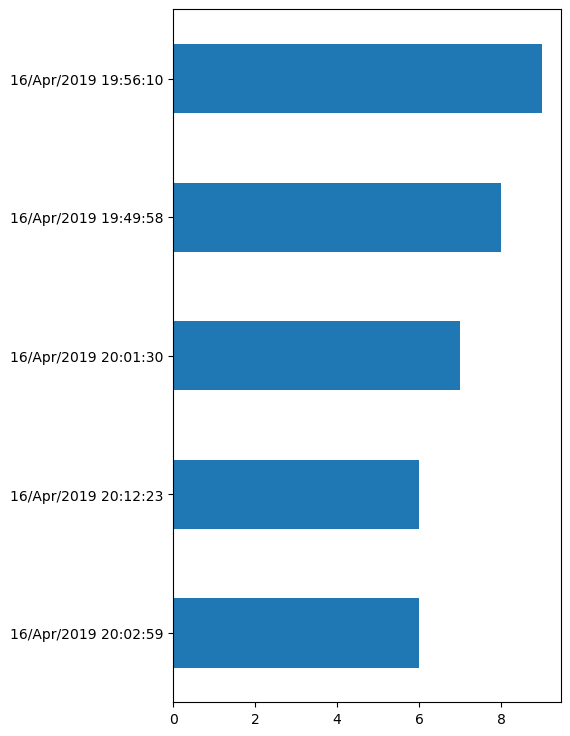

In [25]:
time_df['count'].sort_values().tail(5).plot.barh(figsize=(5, 9))


In [36]:
time_df.index.dtype

dtype('O')